In [197]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [229]:
N = 10
T = 30
k = 1/180
h = 2
rho_max = 20
v_max = 100
tau = 0.1
chi = 120
c0 = 350
l = 3
m = 1.8    
rho = np.empty((N+1, T+1))
v = np.empty((N+1, T+1))

In [230]:
time = np.linspace(0, k*T, T+1)
space = np.linspace(0, h*N, N+1)

In [231]:
# initial
rho[:, 0] = np.round(5 + 3*np.exp((-(space - 7)**2)/5), 2)
v[:, 0] = v_max*(1 - rho[:, 0]/rho_max)


In [232]:
# boundary
rho[0, :] = rho[0, 0]
v[0, :] = v[0, 0]

In [233]:
r = k/h
for t in range(1, T+1):
    for s in range(1, N+1):
        rho[s, t] = rho[s, t-1] + r*(v[s-1, t-1]*rho[s-1, t-1] - v[s, t-1]*rho[s, t-1])
    for s in range(1, N):    
        v[s, t] = v[s, t-1] + k/tau*(v_max*(1 - (rho[s, t-1]/rho_max)**l)**m - v[s, t-1]) + r*v[s, t-1]*(v[s-1, t-1] - v[s, t-1]) - c0*r*(rho[s+1, t-1] - rho[s, t-1])/(chi + rho[s, t-1]) 

In [234]:
x = np.linspace(0, 300, 500)
y = v_max*(1 - (x/rho_max)**l)**m - v_max*m*l*((x/rho_max)**l)*(1 - (x/rho_max)**l)**(m-1)

/tmp/ipykernel_681/2278706908.py:2: RuntimeWarning: invalid value encountered in power
  y = v_max*(1 - (x/rho_max)**l)**m - v_max*m*l*((x/rho_max)**l)*(1 - (x/rho_max)**l)**(m-1)


In [235]:
max(abs(y))*k/h

0.378637196383102

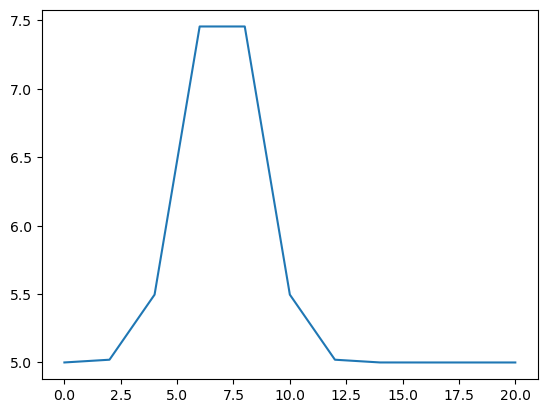

In [236]:
plt.plot(space,  5 + 3*np.exp((-(space - 7)**2)/5))

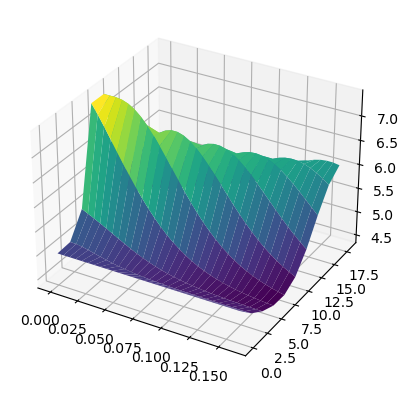

In [237]:
S, T = np.meshgrid(space[0:-1], time[0:-1])
ax = plt.axes(projection='3d')
ax.plot_surface(T, S, rho.transpose()[0:-1, 0:-1], cmap='viridis', edgecolor='none')

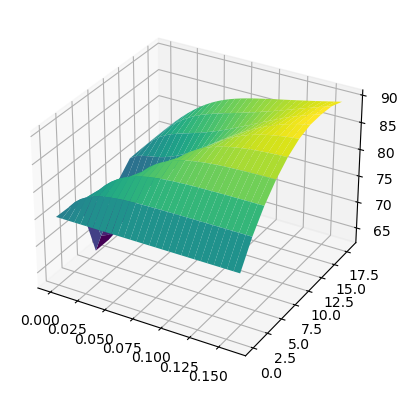

In [239]:
ax = plt.axes(projection='3d')
ax.plot_surface(T, S, v.transpose()[0:-1, 0:-1], cmap='viridis', edgecolor='none')